In [1]:
#I will be using Bandwidth_GB_Year as my target variable. 
#My intent is to determine which variables contribute the most to this variables output

#First things first, import all of the necessary packages
import pandas as pd
import numpy as np

#For the visualizations import:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#For Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#And for the statistical tests:
import scipy.stats as stats
import pylab
from statsmodels.formula.api import ols
import statistics

In [2]:
# Now lets import our dataset using the pd.read_csv function
churn_df = pd.read_csv('churn_clean.csv')

In [3]:
# To stay with best practices, we use the head function to look 
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
# We see that the values in the monthly charge column have alot of values after the decimal point. Lets round that to the nearest 100th decimal place.
churn_df['MonthlyCharge'] = churn_df['MonthlyCharge'].apply(lambda x: round(x, 2))

In [5]:
# We notice that the columns for items1 through 8 could be named a bit more obviously. Lets change those names.
churn_df.rename(columns ={'Item1':'Timely_Response', 'Item2':'Timely_Fixes', 'Item3':'Timely_Replacements', 'Item4':'Reliablility', 'Item5':'Plentiful_Options', 'Item6':'Respectfullness', 'Item7':'Courteous_Exchanges', 'Item8':'Active_Listening'}, inplace=True)

In [6]:
# Lets pull the head of the dataframe again to make sure our changes went through.
churn_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliablility,Plentiful_Options,Respectfullness,Courteous_Exchanges,Active_Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.46,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.63,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.95,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.96,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.95,271.493436,4,4,4,3,4,4,4,5


In [7]:
#Okay now lets take a look at these binary (yes/no) and ordinal categorical varaibles. We can convert these 
#to numeric values to enable them to work with our model that we create.

#Convert the binary varibles
churn_df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in churn_df['Churn']]

In [8]:
# Checking for Null Values
churn_df.isna().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

In [9]:
# Now lets Drop some of the columns that arent necessary.
churn_df = churn_df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County' , 'Zip' , 'Lat' , 'Lng' , 'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod'])

#Lets also drop the original categorical varible columns as well since we dont need them anymore
churn_df = churn_df.drop(columns=['Gender' , 'Churn' , 'Techie' , 'Contract' , 'Port_modem' , 'Tablet' ,'InternetService' , 'Phone' , 'Multiple' ,'OnlineSecurity' ,'OnlineBackup', 'DeviceProtection' ,'TechSupport' ,'StreamingTV', 'StreamingMovies', 'PaperlessBilling'])

In [10]:
#Lets pull the head function once more to verify that this step was completed
churn_df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Response,Timely_Fixes,Timely_Replacements,Reliablility,Plentiful_Options,Respectfullness,Courteous_Exchanges,Active_Listening,DummyChurn
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.46,904.536110,5,5,5,3,4,4,3,4,0
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.63,800.982766,3,4,3,3,4,3,4,4,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.95,2054.706961,4,4,2,4,4,3,3,3,0
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.96,2164.579412,4,4,4,2,5,4,3,3,0
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.95,271.493436,4,4,4,3,4,4,4,5,1


In [11]:
# Now lets get a brief summary of the statistics  for our variables

#Age summary statistics
churn_df.Age.describe()

#The below shows the mean age is 53, with the youngest age being 18 and the oldest age being 89

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [12]:
#Children summary statistics
churn_df.Children.describe()

#The below show s that the mean number of children is 2, the min is of course 0 and the max number is 10

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [13]:
#Income summary statistics
churn_df.Income.describe()

#The below shows the mean income is $39,806.93 with the min being $348.67 and the max being $258,900.70

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [14]:
#Outage_sec_perweek summary statistics
churn_df.Outage_sec_perweek.describe()

#The below shows the mean as 10 with the min being 0 and the max being 21

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [15]:
#Yearly equip failure summary statistics
churn_df.Yearly_equip_failure.describe()

#The below shows the mean being at .40 with the min being 0 and the max being 6

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [16]:
#Tenure summary statistics
churn_df.Tenure.describe()

#The below shows the mean being at 34.53 with the min being at 1 and the max being at 72

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [17]:
#MonthlyCharge summary statistics
churn_df.MonthlyCharge.describe()

#The below shows the mean as $172.62 with the minimum amount being $42.00 94 and the max being 290 

count    10000.000000
mean       172.624798
std         42.942984
min         79.980000
25%        139.980000
50%        167.480000
75%        200.737500
max        290.160000
Name: MonthlyCharge, dtype: float64

In [18]:
#Bandwidth_GB_Year summary statistics
churn_df.Bandwidth_GB_Year.describe()

#The below shows the mean as 3,392.34 GB used per year with the minimum amount being 155.51 and the max being  7,158.98

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [19]:
#Lets also get some summary statistics for some categorical variables that were mentioned previously as well as well

#Timely Response
churn_df.Timely_Response.describe()

#The below shows the mean to be 

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Timely_Response, dtype: float64

In [20]:
#TimelyFixes
churn_df.Timely_Fixes.describe()

count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Timely_Fixes, dtype: float64

In [21]:
#Timely Replacements
churn_df.Timely_Replacements.describe()

count    10000.000000
mean         3.487000
std          1.027977
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Timely_Replacements, dtype: float64

In [22]:
#Reliablility
churn_df.Reliablility.describe()

count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Reliablility, dtype: float64

In [23]:
#Plentiful_Options
churn_df.Plentiful_Options.describe()

count    10000.000000
mean         3.492900
std          1.024819
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Plentiful_Options, dtype: float64

In [24]:
#Respectfullness
churn_df.Respectfullness.describe()

count    10000.000000
mean         3.497300
std          1.033586
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Respectfullness, dtype: float64

In [25]:
#Courteous_Exchanges
churn_df.Courteous_Exchanges.describe()

count    10000.000000
mean         3.509500
std          1.028502
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Courteous_Exchanges, dtype: float64

In [26]:
#Active_Listening
churn_df.Active_Listening.describe()

count    10000.000000
mean         3.495600
std          1.028633
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Active_Listening, dtype: float64

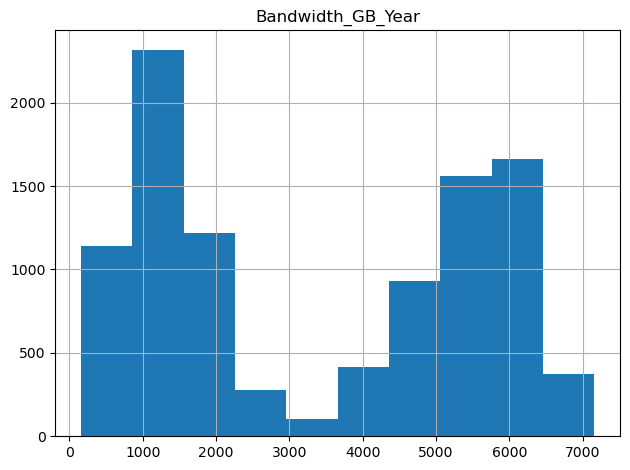

In [27]:
#With the summary statistics for each variable generated, we can now create some univarate and bivarate visualizations for them

#Lets start with some univarate visualizations for each of our variables.

#Bandwidth_Gb_Year histogram
churn_df[['Bandwidth_GB_Year']].hist()

#Lets use tight_layout so that the visualizations can fit
plt.tight_layout()

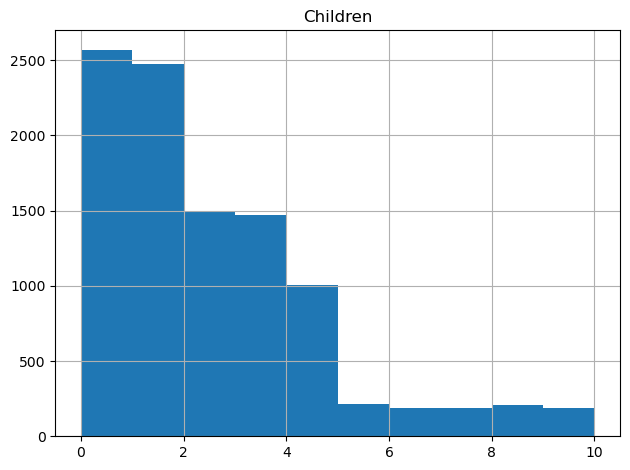

In [28]:
#Children histogram
churn_df[['Children']].hist()
plt.tight_layout()

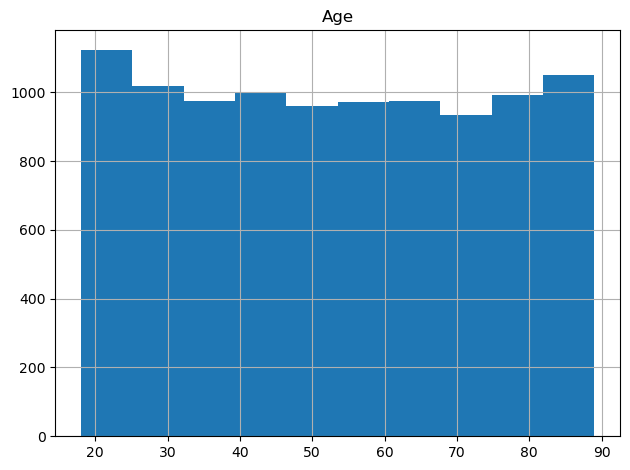

In [29]:
# Age histogram
churn_df[['Age']].hist()
plt.tight_layout()

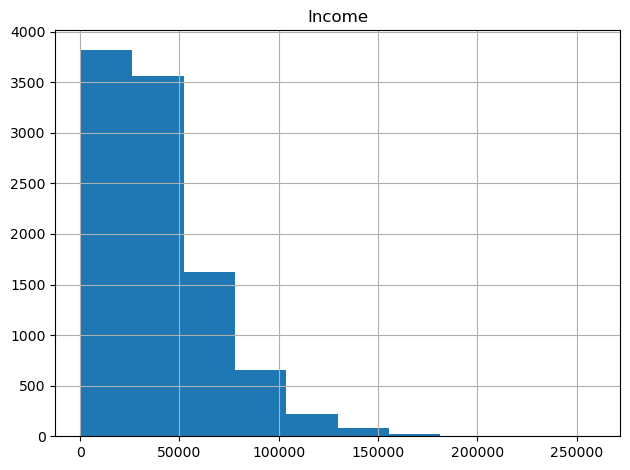

In [30]:
#Income histogram
churn_df[['Income']].hist()
plt.tight_layout()

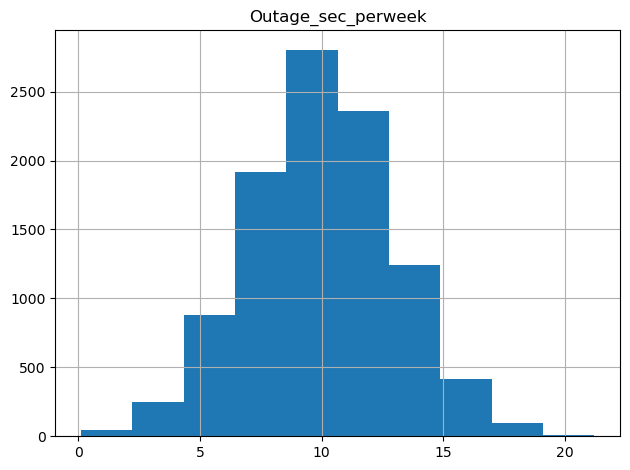

In [31]:
#Outage sec perweek histogram
churn_df[['Outage_sec_perweek']].hist()
plt.tight_layout()

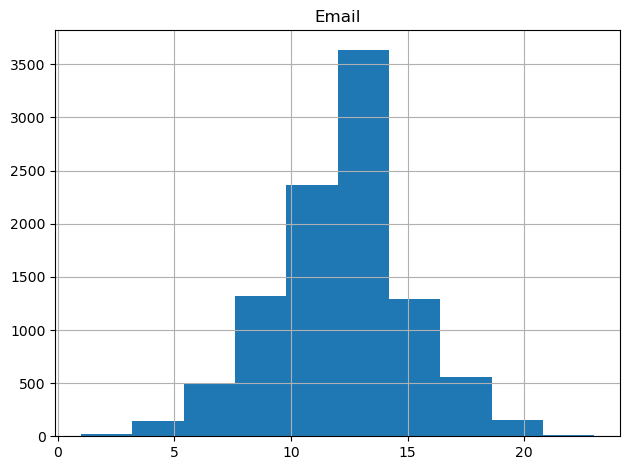

In [32]:
#Email histogram
churn_df[['Email']].hist()
plt.tight_layout()

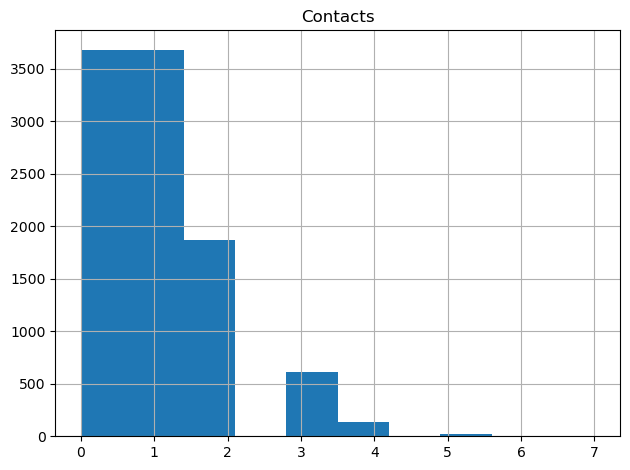

In [33]:
#Contacts histogram
churn_df[['Contacts']].hist()
plt.tight_layout()

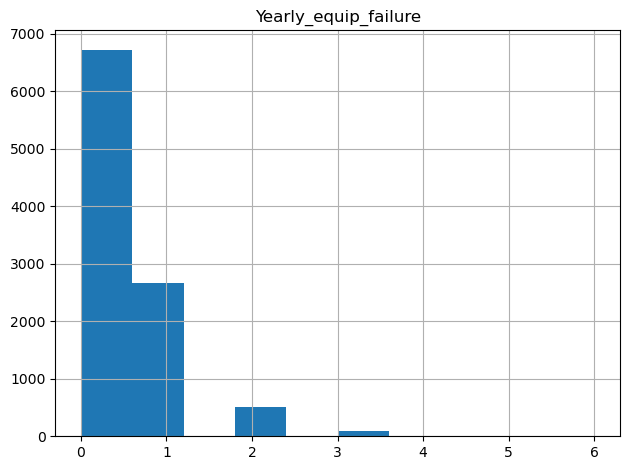

In [34]:
#Yearly Equip failure histogram
churn_df[['Yearly_equip_failure']].hist()
plt.tight_layout()

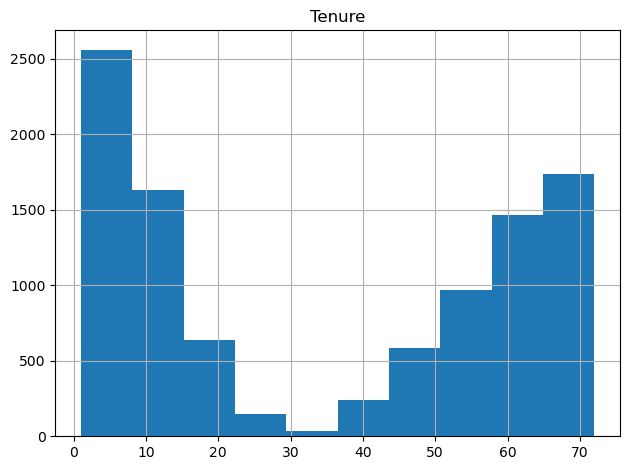

In [35]:
#Tenure histogram
churn_df[['Tenure']].hist()
plt.tight_layout()

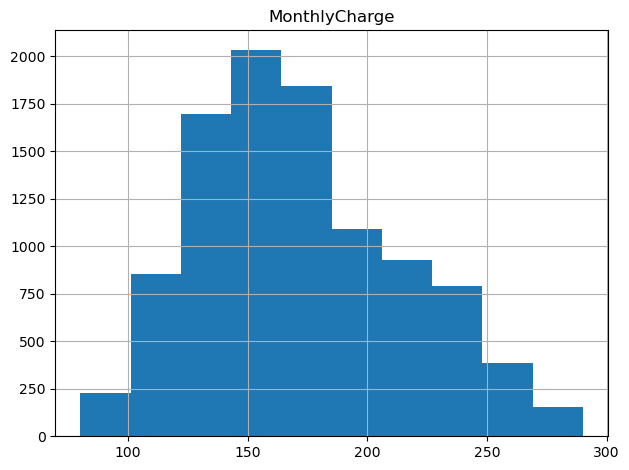

In [36]:
#Monthly Charge histogram
churn_df[['MonthlyCharge']].hist()
plt.tight_layout()

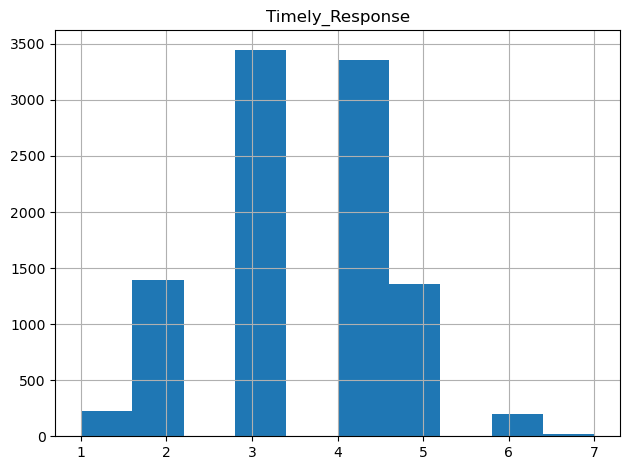

In [37]:
#Timely_Response histogram
churn_df[['Timely_Response']].hist()
plt.tight_layout()

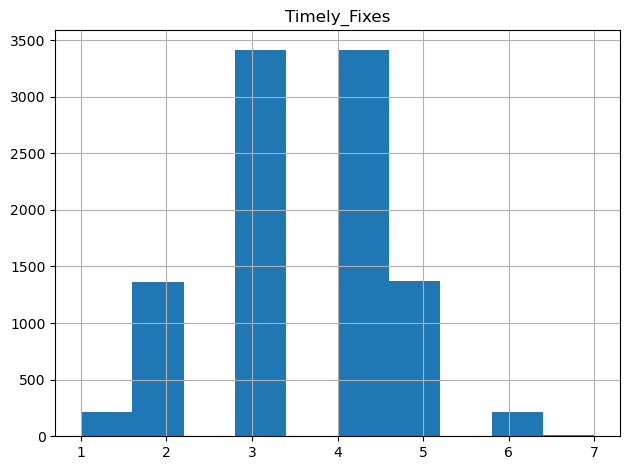

In [38]:
#Timely_Fixes histogram
churn_df[['Timely_Fixes']].hist()
plt.tight_layout()

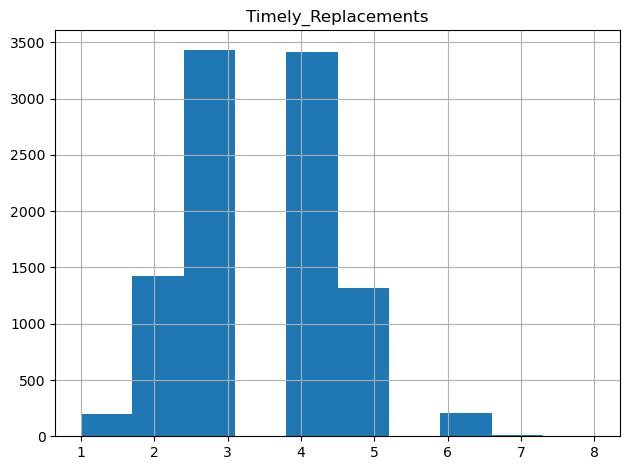

In [39]:
#Timely_Replacements histogram
churn_df[['Timely_Replacements']].hist()
plt.tight_layout()

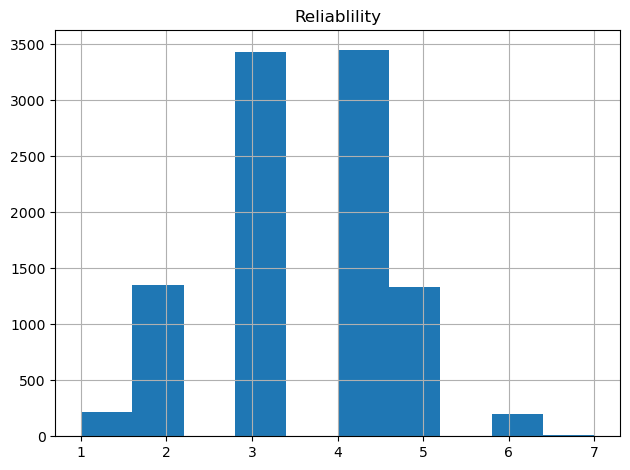

In [40]:
#Reliablility histogram
churn_df[['Reliablility']].hist()
plt.tight_layout()

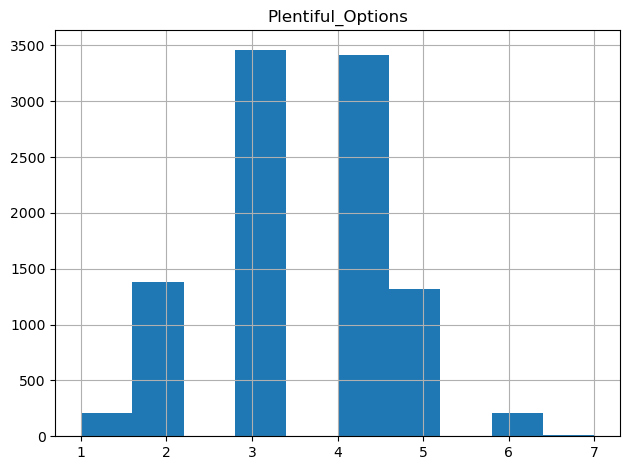

In [41]:
#Plentiful_Options histogram
churn_df[['Plentiful_Options']].hist()
plt.tight_layout()

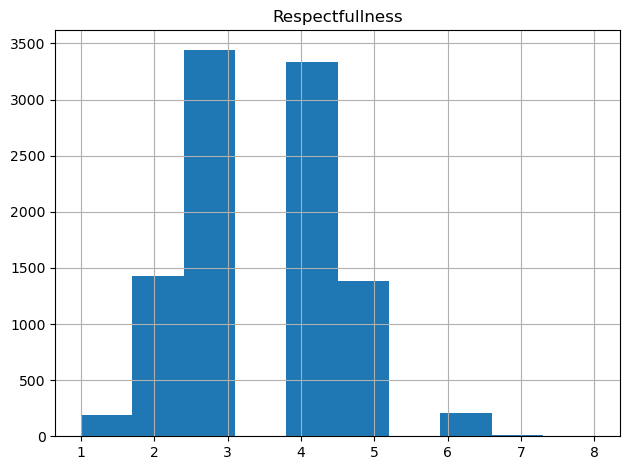

In [42]:
#Respectfullness histogram
churn_df[['Respectfullness']].hist()
plt.tight_layout()

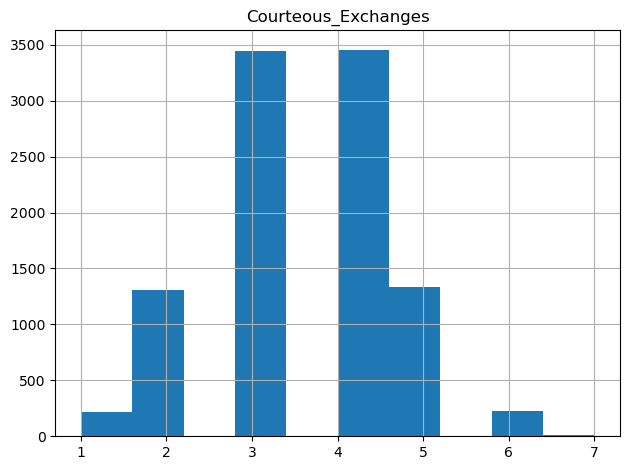

In [43]:
#Courteous_Exchanges histogram
churn_df[['Courteous_Exchanges']].hist()
plt.tight_layout()

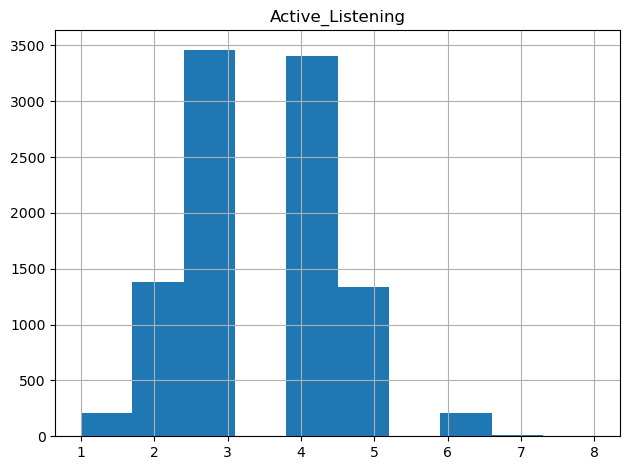

In [44]:
#Active_Listening histogram
churn_df[['Active_Listening']].hist()
plt.tight_layout()

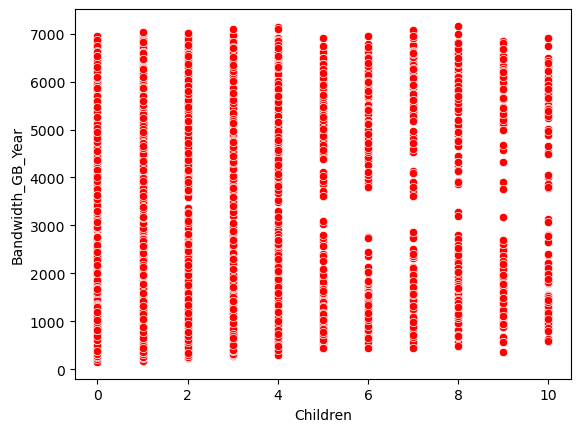

In [45]:
#Now lets create some bivarate visualization to see if there is anything we can notice between our independent variables and our dependent variable.

#Children to Bandwidth_GB_Year
sns.scatterplot(x=churn_df['Children'], y=churn_df['Bandwidth_GB_Year'],
                color='red')
plt.show()

<Axes: xlabel='Tenure', ylabel='Bandwidth_GB_Year'>

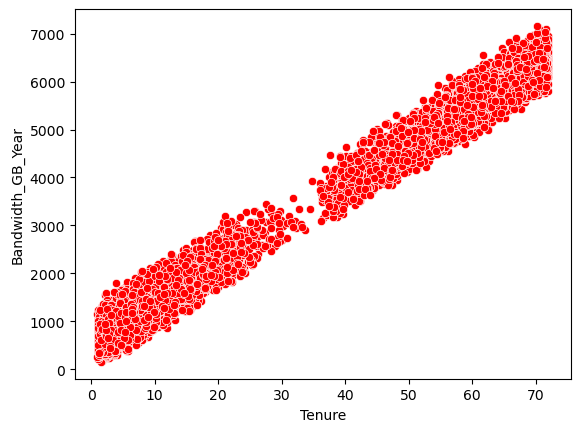

In [46]:
#Tenure to Bandwidth_GB_Year
sns.scatterplot(x=churn_df['Tenure'], y=churn_df['Bandwidth_GB_Year'],
                color='red')

<Axes: xlabel='Email', ylabel='Bandwidth_GB_Year'>

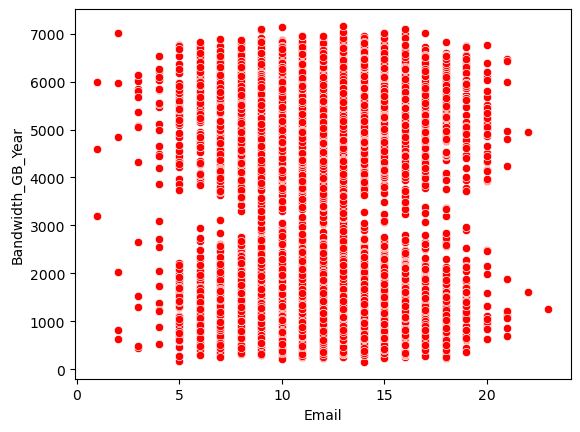

In [47]:
#Email to Bandwidth_GB_Year
sns.scatterplot(x=churn_df['Email'], y=churn_df['Bandwidth_GB_Year'],
                color='red')

<Axes: xlabel='Age', ylabel='Bandwidth_GB_Year'>

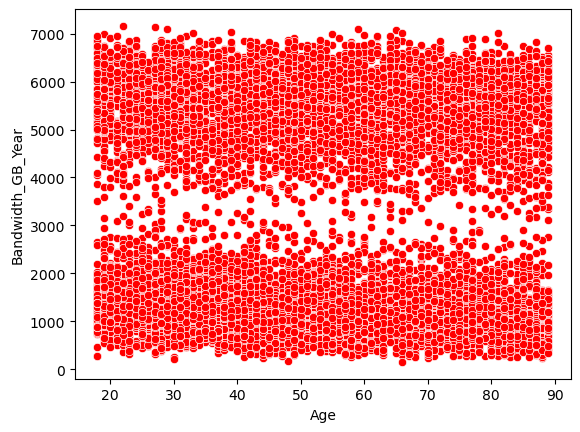

In [48]:
#Age to Bandwidth_GB_Year
sns.scatterplot(x=churn_df['Age'], y=churn_df['Bandwidth_GB_Year'],
                color='red')

<Axes: xlabel='Income', ylabel='Bandwidth_GB_Year'>

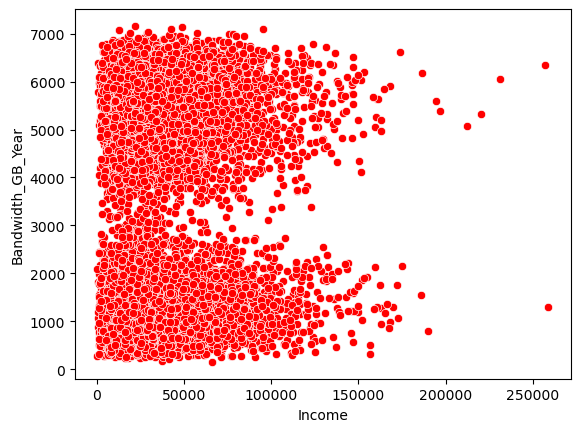

In [49]:
#Income to Bandwidth_GB_Year
sns.scatterplot(x=churn_df['Income'], y=churn_df['Bandwidth_GB_Year'],
                color='red')

<Axes: xlabel='Age', ylabel='Bandwidth_GB_Year'>

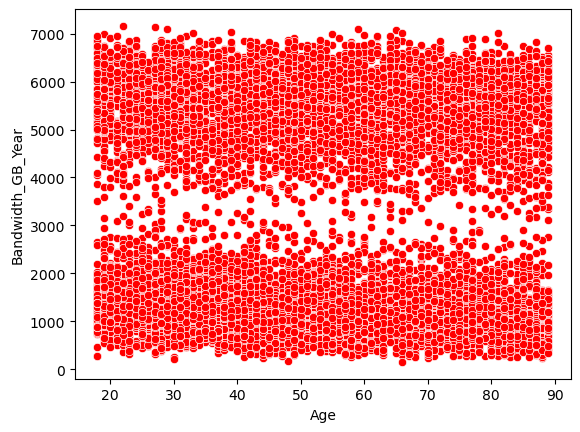

In [50]:
#Outage_sec_perweek to Bandwidth_GB_Year
sns.scatterplot(x=churn_df['Age'], y=churn_df['Bandwidth_GB_Year'],
                color='red')

<Axes: xlabel='Contacts', ylabel='Bandwidth_GB_Year'>

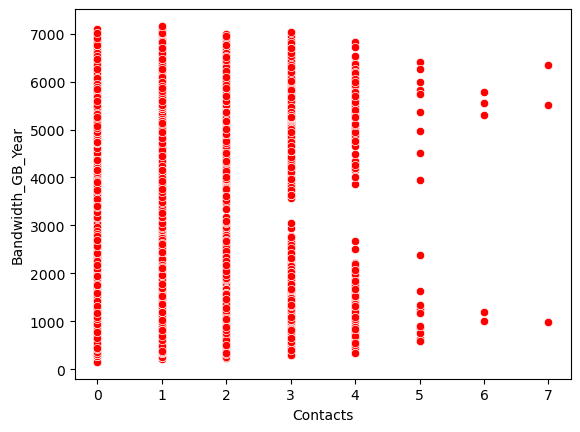

In [51]:
#Contacts to Bandwidth_GB_Year
sns.scatterplot(x=churn_df['Contacts'], y=churn_df['Bandwidth_GB_Year'],
                color='red')

<Axes: xlabel='Yearly_equip_failure', ylabel='Bandwidth_GB_Year'>

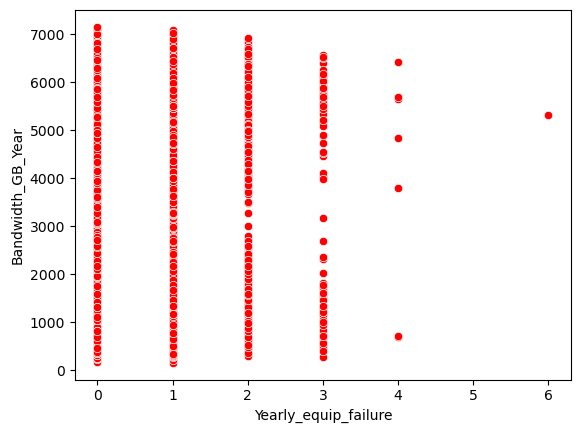

In [52]:
#Yearly_Equip_failure to Bandwidth_GB_Year
sns.scatterplot(x=churn_df['Yearly_equip_failure'], y=churn_df['Bandwidth_GB_Year'],
                color='red')

<Axes: xlabel='MonthlyCharge', ylabel='Bandwidth_GB_Year'>

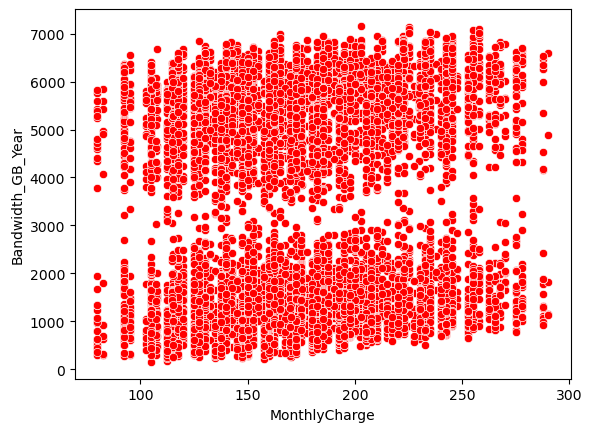

In [53]:
#Monthly Charge to Bandwidth_GB_Year
sns.scatterplot(x=churn_df['MonthlyCharge'], y=churn_df['Bandwidth_GB_Year'],
                color='red')

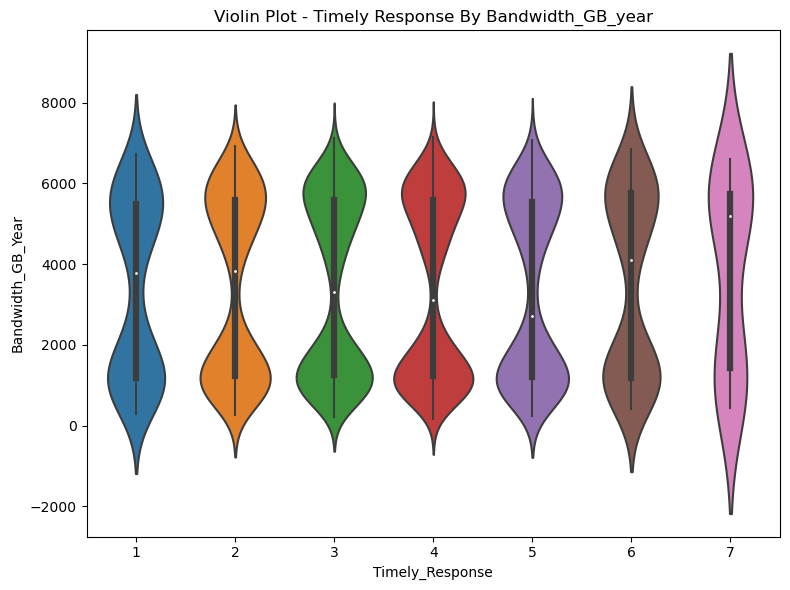

In [54]:
#Timely_Response to Bandwidth_GB_Year

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Timely_Response', y='Bandwidth_GB_Year')
plt.title('Violin Plot - Timely Response By Bandwidth_GB_year')
plt.xlabel('Timely_Response')
plt.ylabel('Bandwidth_GB_Year')
plt.tight_layout() 

plt.show()

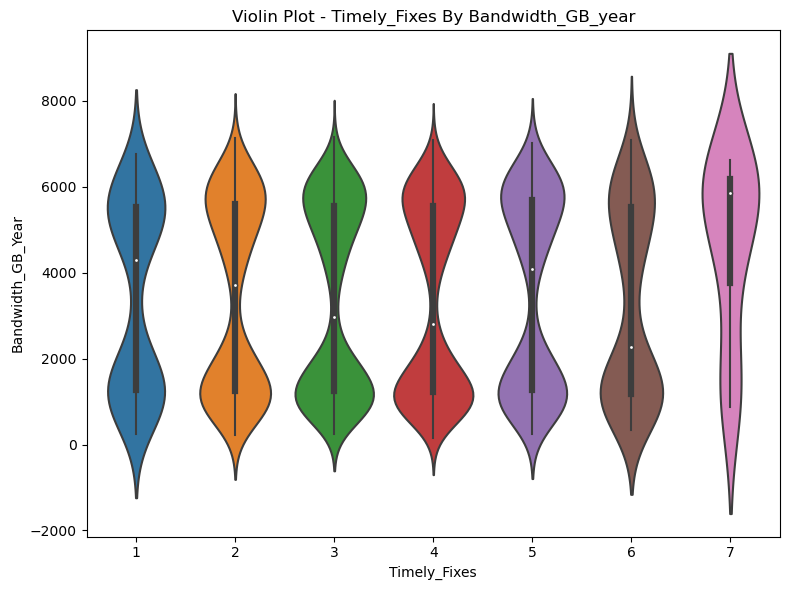

In [55]:
#Timely_Fixes to Bandwidth_GB_Year

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Timely_Fixes', y='Bandwidth_GB_Year')
plt.title('Violin Plot - Timely_Fixes By Bandwidth_GB_year')
plt.xlabel('Timely_Fixes')
plt.ylabel('Bandwidth_GB_Year')
plt.tight_layout() 

plt.show()

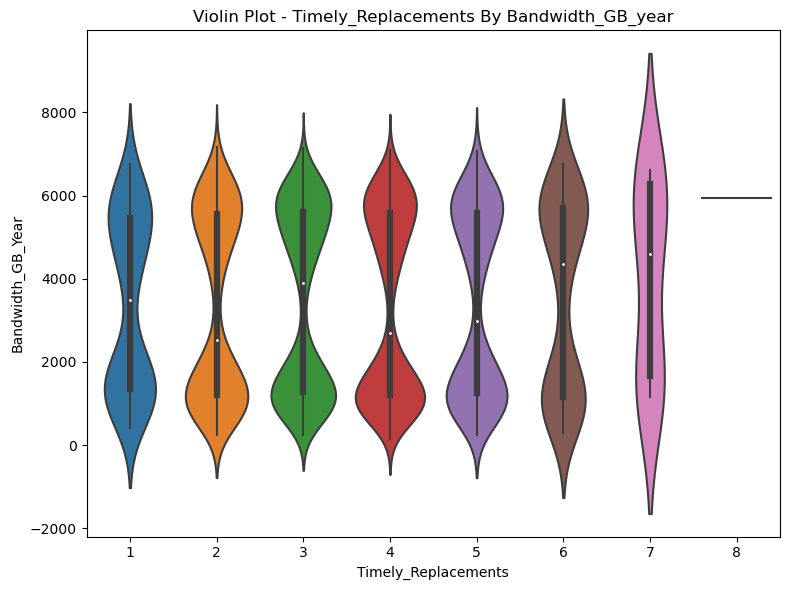

In [56]:
#Timely_Replacements to Bandwidth_GB_Year

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Timely_Replacements', y='Bandwidth_GB_Year')
plt.title('Violin Plot - Timely_Replacements By Bandwidth_GB_year')
plt.xlabel('Timely_Replacements')
plt.ylabel('Bandwidth_GB_Year')
plt.tight_layout() 

plt.show()

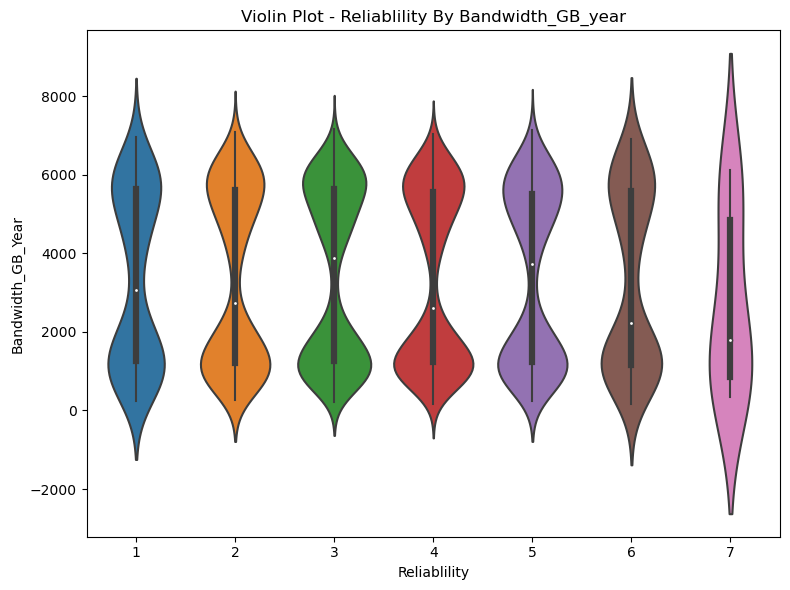

In [57]:
#Reliability to Bandwidth_GB_Year

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Reliablility', y='Bandwidth_GB_Year')
plt.title('Violin Plot - Reliablility By Bandwidth_GB_year')
plt.xlabel('Reliablility')
plt.ylabel('Bandwidth_GB_Year')
plt.tight_layout() 

plt.show()

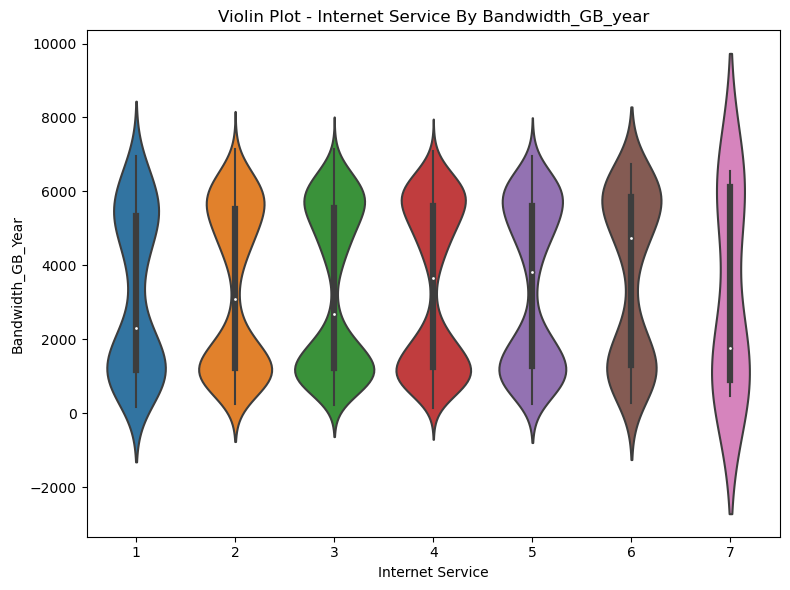

In [58]:
#Plentiful_Options to Bandwidth_GB_Year

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Plentiful_Options', y='Bandwidth_GB_Year')
plt.title('Violin Plot - Internet Service By Bandwidth_GB_year')
plt.xlabel('Internet Service')
plt.ylabel('Bandwidth_GB_Year')
plt.tight_layout() 

plt.show()

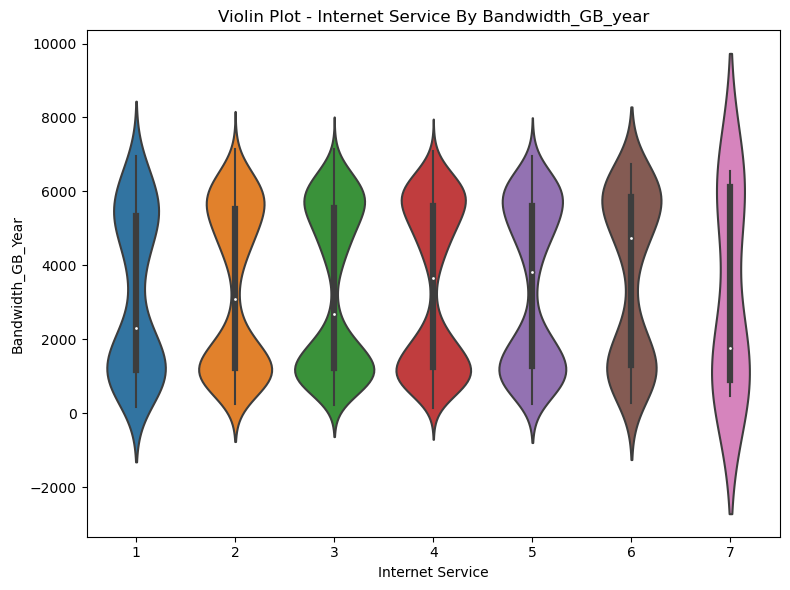

In [59]:
#Plentiful_Options to Bandwidth_GB_Year

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Plentiful_Options', y='Bandwidth_GB_Year')
plt.title('Violin Plot - Internet Service By Bandwidth_GB_year')
plt.xlabel('Internet Service')
plt.ylabel('Bandwidth_GB_Year')
plt.tight_layout() 

plt.show()

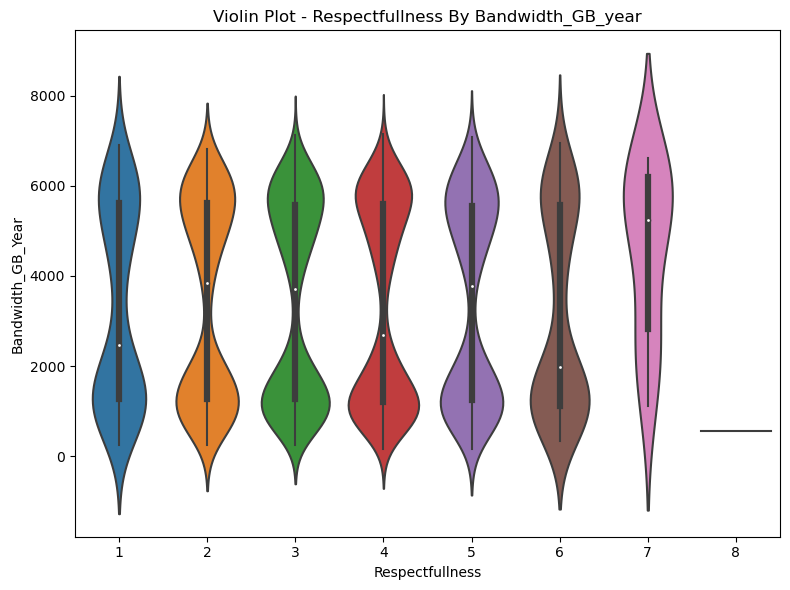

In [60]:
#Respectfulness to Bandwidth_GB_Year

plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Respectfullness', y='Bandwidth_GB_Year')
plt.title('Violin Plot - Respectfullness By Bandwidth_GB_year')
plt.xlabel('Respectfullness')
plt.ylabel('Bandwidth_GB_Year')
plt.tight_layout() 

plt.show()

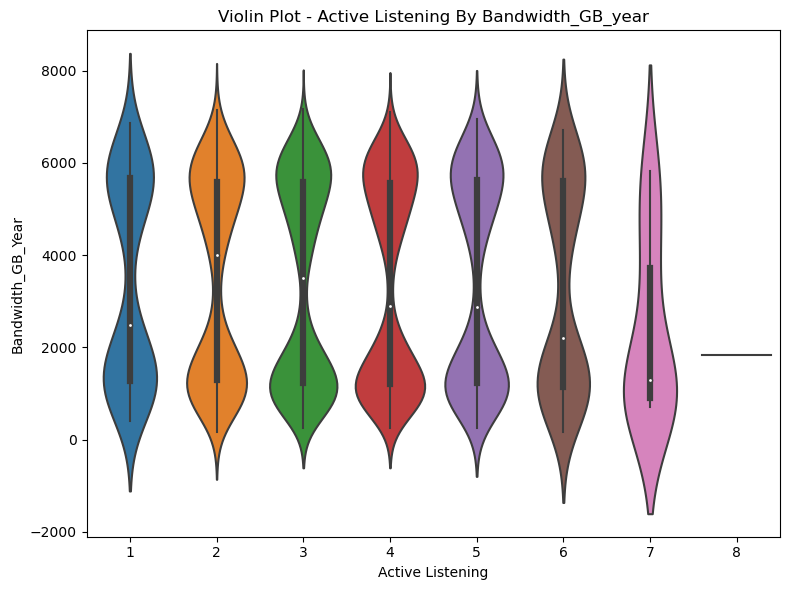

In [61]:
#Active_Listening to Bandwidth_GB_Year
plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Active_Listening', y='Bandwidth_GB_Year')
plt.title('Violin Plot - Active Listening By Bandwidth_GB_year')
plt.xlabel('Active Listening')
plt.ylabel('Bandwidth_GB_Year')
plt.tight_layout() 

plt.show()

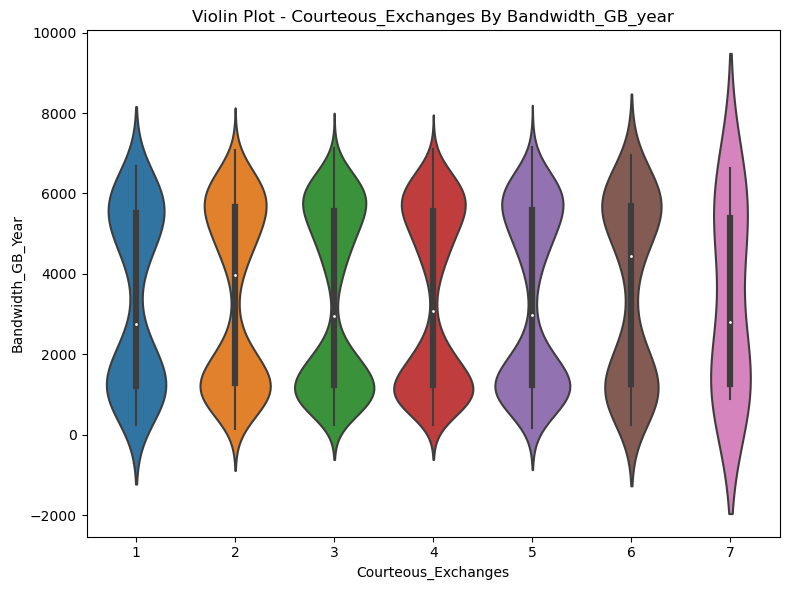

In [62]:
#Courteous_Exchanges to Bandwidth_GB_Year
plt.figure(figsize=(8, 6))
ax = sns.violinplot(data=churn_df, x='Courteous_Exchanges', y='Bandwidth_GB_Year')
plt.title('Violin Plot - Courteous_Exchanges By Bandwidth_GB_year')
plt.xlabel('Courteous_Exchanges')
plt.ylabel('Bandwidth_GB_Year')
plt.tight_layout() 

plt.show()

In [63]:
##Now that we have created our bivarate visualizations, lets save our newly prepared data
churn_df.to_csv('churn_prepared.csv')
df = churn_df.columns
print(df)

#I just learned that we can add .columns after churn_df to just get the column names

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Timely_Response', 'Timely_Fixes', 'Timely_Replacements',
       'Reliablility', 'Plentiful_Options', 'Respectfullness',
       'Courteous_Exchanges', 'Active_Listening', 'DummyChurn'],
      dtype='object')


In [64]:
#Now, next in the PA we must Construct an initial multiple linear regression model from all independent variables that we identified earlier.

#For the churn first I will create an initial model equation using the OLS() method and the fit() method
initial_GBm = ols("Bandwidth_GB_Year ~ Children + DummyChurn + Age + Income + Outage_sec_perweek + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Timely_Replacements + Reliablility + Plentiful_Options + Respectfullness + Courteous_Exchanges + Active_Listening", data=churn_df).fit()

#Next we will print the parameters of our initial model
print(initial_GBm.params)

#Then we will print a summary of the next model
print(initial_GBm.summary())

Intercept               107.729409
Children                 30.996045
DummyChurn              129.533143
Age                      -3.347458
Income                    0.000083
Outage_sec_perweek       -0.222400
Email                    -0.364600
Contacts                  2.496137
Yearly_equip_failure      1.556167
Tenure                   83.058283
MonthlyCharge             2.782419
Timely_Response          -8.275341
Timely_Fixes              3.923435
Timely_Replacements      -0.350400
Reliablility              0.204569
Plentiful_Options         2.892153
Respectfullness           1.574107
Courteous_Exchanges      -1.240146
Active_Listening          5.670587
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.240e+04
Date

In [65]:
#Backwards stepwise elimination can be used to reduce our  model. With this we will continue to remove independent variables above the significance level until all that is left are variables that are below 0.05.

#Lets use the P-values shown in the above OLS regression results to determine what we should remove from the model and create a new one
GBmodel1 = ols("Bandwidth_GB_Year ~ Children + DummyChurn + Age + Income + Outage_sec_perweek + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Timely_Replacements + Plentiful_Options + Respectfullness + Courteous_Exchanges + Active_Listening", data=churn_df).fit()

#Then we will print a summary of the next model
print(GBmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.549e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:02:37   Log-Likelihood:                -68288.
No. Observations:               10000   AIC:                         1.366e+05
Df Residuals:                    9982   BIC:                         1.367e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              108.6263 

In [66]:
#Backwards stepwise elimination can be used to reduce our  model. With this we will continue to remove independent variables above the significance level until all that is left are variables that are below 0.05.

#Lets use the P-values shown in the above OLS regression results to determine what we should remove from the model and create a new one
GBmodel1 = ols("Bandwidth_GB_Year ~ Children + DummyChurn + Age + Income + Outage_sec_perweek + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Timely_Replacements + Plentiful_Options + Respectfullness + Courteous_Exchanges + Active_Listening", data=churn_df).fit()

#Then we will print a summary of the next model
print(GBmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 5.549e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:02:37   Log-Likelihood:                -68288.
No. Observations:               10000   AIC:                         1.366e+05
Df Residuals:                    9982   BIC:                         1.367e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              108.6263 

In [67]:
GBmodel3 = ols("Bandwidth_GB_Year ~ Children + DummyChurn + Age + Income + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Plentiful_Options + Respectfullness + Courteous_Exchanges + Active_Listening", data=churn_df).fit()

print(GBmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.290e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:02:37   Log-Likelihood:                -68288.
No. Observations:               10000   AIC:                         1.366e+05
Df Residuals:                    9984   BIC:                         1.367e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              106.0832 

In [68]:
GBmodel4 = ols("Bandwidth_GB_Year ~ Children + DummyChurn + Age + Income + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Plentiful_Options + Courteous_Exchanges + Active_Listening", data=churn_df).fit()

print(GBmodel4.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.740e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:02:37   Log-Likelihood:                -68288.
No. Observations:               10000   AIC:                         1.366e+05
Df Residuals:                    9985   BIC:                         1.367e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              109.2429 

In [69]:
GBmodel5 = ols("Bandwidth_GB_Year ~ Children + DummyChurn + Age + Income + Email +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Plentiful_Options + Active_Listening", data=churn_df).fit()

print(GBmodel5.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.259e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:02:37   Log-Likelihood:                -68288.
No. Observations:               10000   AIC:                         1.366e+05
Df Residuals:                    9986   BIC:                         1.367e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              106.6194 

In [70]:
GBmodel6 = ols("Bandwidth_GB_Year ~ Children + DummyChurn + Age + Income +Contacts +Yearly_equip_failure +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Plentiful_Options + Active_Listening", data=churn_df).fit()

print(GBmodel6.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.864e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:02:37   Log-Likelihood:                -68289.
No. Observations:               10000   AIC:                         1.366e+05
Df Residuals:                    9987   BIC:                         1.367e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              102.1725 

In [71]:
GBmodel7 = ols("Bandwidth_GB_Year ~ Children + DummyChurn + Age + Income +Contacts +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Plentiful_Options + Active_Listening", data=churn_df).fit()

print(GBmodel7.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 8.580e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:02:37   Log-Likelihood:                -68289.
No. Observations:               10000   AIC:                         1.366e+05
Df Residuals:                    9988   BIC:                         1.367e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           102.8131     17.92

In [72]:
GBmodel8 = ols("Bandwidth_GB_Year ~ Children + DummyChurn + Age +Contacts +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Plentiful_Options + Active_Listening", data=churn_df).fit()

print(GBmodel8.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 9.438e+04
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:02:37   Log-Likelihood:                -68289.
No. Observations:               10000   AIC:                         1.366e+05
Df Residuals:                    9989   BIC:                         1.367e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           106.0356     17.65

In [73]:
GBmodel9 = ols("Bandwidth_GB_Year ~ Children + DummyChurn + Age +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Plentiful_Options + Active_Listening", data=churn_df).fit()

print(GBmodel9.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:02:37   Log-Likelihood:                -68290.
No. Observations:               10000   AIC:                         1.366e+05
Df Residuals:                    9990   BIC:                         1.367e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           108.5142     17.51

In [74]:
GBmodel10 = ols("Bandwidth_GB_Year ~ Children + DummyChurn + Age +Tenure + MonthlyCharge + Timely_Response + Timely_Fixes + Active_Listening", data=churn_df).fit()

print(GBmodel10.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.180e+05
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:02:37   Log-Likelihood:                -68291.
No. Observations:               10000   AIC:                         1.366e+05
Df Residuals:                    9991   BIC:                         1.367e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          119.3156     15.102  

In [75]:
GBmodel11 = ols("Bandwidth_GB_Year ~ Children + DummyChurn + Age +Tenure + MonthlyCharge + Timely_Response + Active_Listening", data=churn_df).fit()

print(GBmodel11.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.348e+05
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:02:37   Log-Likelihood:                -68292.
No. Observations:               10000   AIC:                         1.366e+05
Df Residuals:                    9992   BIC:                         1.367e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          123.3444     14.821  

In [76]:
#For our reduced model, we can now use the variables from our visualization above that are closest to 1 (positively or negatively)
final_GBm = ols('Bandwidth_GB_Year ~ Children + DummyChurn + Age +Tenure + MonthlyCharge + Timely_Response + Active_Listening', data=churn_df).fit()

#Print the parameters of our reduced model
print(final_GBm.params)

#Print a summary of the reduced model
print(final_GBm.summary())

Intercept           123.344431
Children             30.990942
DummyChurn          129.594785
Age                  -3.343875
Tenure               83.063188
MonthlyCharge         2.781415
Timely_Response      -5.615436
Active_Listening      5.449179
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.348e+05
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:02:38   Log-Likelihood:                -68292.
No. Observations:               10000   AIC:                         1.366e+05
Df Residuals:                    9992   BIC:                         1.367e+05
Df Model:                           7                                         
Covariance Type:          

In [77]:
#With this we now have all of the variables whose p-value is under our significance level of 0.05


In [78]:
#Looking at the above OLS regression results, we can see that even after removing all of those other variables, we have maintained a 99% R-squared and adjusted R-squared value.

In [79]:
#Lastly we need to create a residual plot for our new reduced linear regression model
# Plot residuals vs fitted values using Seaborn

#Lets take our model and make objects for our fitted and residual values
fitted = final_GBm.fittedvalues

residuals = final_GBm.resid

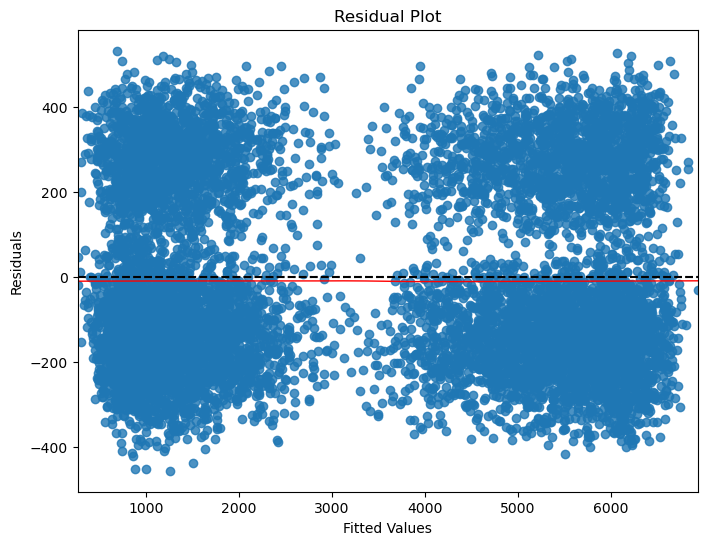

In [80]:
#Now lastly we will just create this residual plot

plt.figure(figsize=(8, 6))
sns.residplot(x= fitted, y=residuals, data=churn_df, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

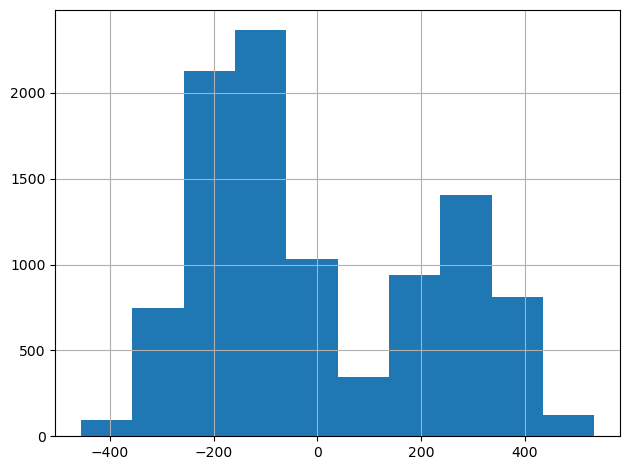

In [81]:
#Here is also a histogram of our residuals to check for normality
residuals.hist()
plt.tight_layout()

In [82]:
#Last but not least, lets calculate the residual standard error to determine the strength of our model.

#Lets take our residual object that we created earlier and calculate the sum of the squared residuals
SSR = np.sum(residuals**2)

#Lets set our number of predictors (independent variables) to an object and our number of residual observations to an object
predictors = 4

n = len(residuals)

#We can now calculate our residual standard error using the below equation
RSE = np.sqrt(SSR/ (n - predictors - 1))

#Lets print our results now
print(RSE)

223.7351356435513


In [83]:
#This result is rather high and indicates that, while the model isnt bad, it can still be improved even further.

In [84]:
#Lets now create a regression equation
coefficients = final_GBm.params

print(coefficients)

Intercept           123.344431
Children             30.990942
DummyChurn          129.594785
Age                  -3.343875
Tenure               83.063188
MonthlyCharge         2.781415
Timely_Response      -5.615436
Active_Listening      5.449179
dtype: float64
